In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SolarBaselineRegression(nn.Module):

    def __init__(self, input_channels=3, num_classes=1):
        super(SolarBaselineRegression, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes),
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        features = self.features(x)
        irradiance = self.regressor(features)
        return irradiance

    def get_features(self, x):
        with torch.no_grad():
            features = self.features(x)
            return features.flatten(1)

class SolarBaselineWithFeatureExtraction(SolarBaselineRegression):

    def __init__(self, input_channels=3, feature_dim=512):
        super().__init__(input_channels, 1)
        self.feature_dim = feature_dim

        self.feature_projector = nn.Sequential(
            nn.Linear(512, feature_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
        )

    def forward(self, x, return_features=False):
        conv_features = self.features(x)
        flattened_features = conv_features.flatten(1)

        irradiance = self.regressor[-3:]((
            self.regressor[:-3](flattened_features)
        ))

        if return_features:
            projected_features = self.feature_projector(flattened_features)
            return irradiance, projected_features

        return irradiance

class SolarBaseline(SolarBaselineRegression):

    pass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading multi-day dataset...
Train samples: 2690, Val samples: 673
Using device: cuda
Starting training for 50 epochs...
Model parameters: 1,734,913

Epoch 1/50


Training: 100%|██████████| 22/22 [00:26<00:00,  1.22s/it, Loss=25773.3867]


Train Loss: 23716.5190


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s, Val Loss=22998.3555]


Val Loss: 23806.3945, RMSE: 154.66 W/m², MAE: 135.57 W/m²
New best model saved! RMSE: 154.66 W/m²

Epoch 2/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=3745.1726]


Train Loss: 22606.9215


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s, Val Loss=22952.3535]


Val Loss: 23759.7536, RMSE: 154.51 W/m², MAE: 135.40 W/m²
New best model saved! RMSE: 154.51 W/m²

Epoch 3/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=24695.6641]


Train Loss: 23031.9767


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Val Loss=22586.5059]


Val Loss: 23436.7497, RMSE: 153.48 W/m², MAE: 134.40 W/m²
New best model saved! RMSE: 153.48 W/m²

Epoch 4/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s, Loss=37669.4805]


Train Loss: 22179.1995


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.22it/s, Val Loss=20843.3633]


Val Loss: 21864.9997, RMSE: 148.36 W/m², MAE: 129.69 W/m²
New best model saved! RMSE: 148.36 W/m²

Epoch 5/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=2253.3184]


Train Loss: 17719.1407


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s, Val Loss=15807.8350]


Val Loss: 16882.5835, RMSE: 130.52 W/m², MAE: 113.95 W/m²
New best model saved! RMSE: 130.52 W/m²

Epoch 6/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.19it/s, Loss=2535.7478]


Train Loss: 13354.7599


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s, Val Loss=6320.2793]


Val Loss: 5314.5920, RMSE: 71.92 W/m², MAE: 54.73 W/m²
New best model saved! RMSE: 71.92 W/m²

Epoch 7/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s, Loss=1445.4556]


Train Loss: 8367.9663


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s, Val Loss=4092.1328]


Val Loss: 3185.5297, RMSE: 55.30 W/m², MAE: 44.92 W/m²
New best model saved! RMSE: 55.30 W/m²

Epoch 8/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=3853.5251]


Train Loss: 4353.1952


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=3344.4741]


Val Loss: 3585.2735, RMSE: 60.16 W/m², MAE: 52.35 W/m²

Epoch 9/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=10721.8691]


Train Loss: 2732.1297


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s, Val Loss=1943.4962]


Val Loss: 1692.9158, RMSE: 40.71 W/m², MAE: 33.71 W/m²
New best model saved! RMSE: 40.71 W/m²

Epoch 10/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=14924.0098]


Train Loss: 2138.3505


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Val Loss=4474.7632]


Val Loss: 3233.9724, RMSE: 55.31 W/m², MAE: 46.75 W/m²

Epoch 11/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=10587.5605]


Train Loss: 2057.3055


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=7745.5283]


Val Loss: 8517.3725, RMSE: 92.88 W/m², MAE: 77.55 W/m²

Epoch 12/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=1620.7649]


Train Loss: 1346.3385


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s, Val Loss=4095.9282]


Val Loss: 4663.2622, RMSE: 68.87 W/m², MAE: 53.76 W/m²

Epoch 13/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=2920.8972]


Train Loss: 1494.2431


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=4093.8154]


Val Loss: 2983.6202, RMSE: 53.17 W/m², MAE: 44.45 W/m²

Epoch 14/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.21it/s, Loss=6954.7256]


Train Loss: 1530.8206


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s, Val Loss=2568.5381]


Val Loss: 1790.0925, RMSE: 40.99 W/m², MAE: 32.37 W/m²

Epoch 15/50


Training: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s, Loss=6449.7573]


Train Loss: 1439.7494


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.24it/s, Val Loss=2632.6511]


Val Loss: 3476.8283, RMSE: 59.97 W/m², MAE: 49.22 W/m²

Epoch 16/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=412.1345]


Train Loss: 1140.6821


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s, Val Loss=4032.5977]


Val Loss: 5237.2322, RMSE: 73.53 W/m², MAE: 59.58 W/m²

Epoch 17/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s, Loss=51.6238]


Train Loss: 1127.5382


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s, Val Loss=5986.8516]


Val Loss: 5036.6159, RMSE: 70.02 W/m², MAE: 55.27 W/m²

Epoch 18/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=403.6607]


Train Loss: 1186.5129


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=5016.2686]


Val Loss: 5247.6975, RMSE: 72.67 W/m², MAE: 58.43 W/m²

Epoch 19/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.22it/s, Loss=2099.9246]


Train Loss: 1170.7098


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s, Val Loss=1998.0062]


Val Loss: 2634.9876, RMSE: 52.20 W/m², MAE: 41.48 W/m²

Epoch 20/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=192.0040]


Train Loss: 1080.4812


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.25it/s, Val Loss=2333.1580]


Val Loss: 1693.3985, RMSE: 40.04 W/m², MAE: 32.04 W/m²

Epoch 21/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=3771.8921]


Train Loss: 1171.3226


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s, Val Loss=3186.4429]


Val Loss: 2924.4669, RMSE: 53.74 W/m², MAE: 41.63 W/m²

Epoch 22/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.22it/s, Loss=8702.2344]


Train Loss: 1375.0448


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.29it/s, Val Loss=3742.5024]


Val Loss: 3803.7474, RMSE: 61.74 W/m², MAE: 48.83 W/m²

Epoch 23/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=4535.4429]


Train Loss: 1196.5907


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s, Val Loss=1112.3032]


Val Loss: 1451.1613, RMSE: 38.72 W/m², MAE: 29.40 W/m²
New best model saved! RMSE: 38.72 W/m²

Epoch 24/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.20it/s, Loss=4478.4980]


Train Loss: 1181.2620


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Val Loss=1097.8036]


Val Loss: 1289.5537, RMSE: 36.29 W/m², MAE: 26.79 W/m²
New best model saved! RMSE: 36.29 W/m²

Epoch 25/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=1266.4041]


Train Loss: 988.3060


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s, Val Loss=2187.5862]


Val Loss: 2128.6611, RMSE: 46.05 W/m², MAE: 35.90 W/m²

Epoch 26/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s, Loss=7679.7881]


Train Loss: 1283.1957


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Val Loss=3369.5320]


Val Loss: 3291.3890, RMSE: 57.27 W/m², MAE: 46.59 W/m²

Epoch 27/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=1284.5160]


Train Loss: 988.6717


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.34it/s, Val Loss=2137.2898]


Val Loss: 1505.2543, RMSE: 37.63 W/m², MAE: 29.32 W/m²

Epoch 28/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=4829.7559]


Train Loss: 1115.0443


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.26it/s, Val Loss=2088.5720]


Val Loss: 1808.5437, RMSE: 42.06 W/m², MAE: 32.03 W/m²

Epoch 29/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=3661.1418]


Train Loss: 1022.8725


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=5386.6030]


Val Loss: 4515.7234, RMSE: 66.28 W/m², MAE: 55.96 W/m²

Epoch 30/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s, Loss=6546.1230]


Train Loss: 1353.0738


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s, Val Loss=24850.2031]


Val Loss: 20638.4840, RMSE: 141.58 W/m², MAE: 117.76 W/m²

Epoch 31/50


Training: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s, Loss=5834.8398]


Train Loss: 1372.7186


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s, Val Loss=1601.5321]


Val Loss: 1331.7518, RMSE: 35.97 W/m², MAE: 26.56 W/m²

Epoch 32/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.19it/s, Loss=806.9336]


Train Loss: 1064.9731


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s, Val Loss=2220.5962]


Val Loss: 1627.7211, RMSE: 39.29 W/m², MAE: 30.44 W/m²

Epoch 33/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=5295.9980]


Train Loss: 1140.1197


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s, Val Loss=1922.2484]


Val Loss: 1688.5139, RMSE: 40.69 W/m², MAE: 29.98 W/m²

Epoch 34/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=5157.3750]


Train Loss: 1213.6144


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s, Val Loss=2214.8284]


Val Loss: 2081.7886, RMSE: 45.42 W/m², MAE: 36.74 W/m²

Epoch 35/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=951.7567]


Train Loss: 1082.3078


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s, Val Loss=1436.7323]


Val Loss: 1407.5759, RMSE: 37.46 W/m², MAE: 25.95 W/m²

Epoch 36/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=6959.4575]


Train Loss: 1298.6357


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=1787.2262]


Val Loss: 1410.5005, RMSE: 36.84 W/m², MAE: 29.43 W/m²

Epoch 37/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=2338.3250]


Train Loss: 1060.8816


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s, Val Loss=1188.2966]


Val Loss: 1222.7504, RMSE: 35.04 W/m², MAE: 26.19 W/m²
New best model saved! RMSE: 35.04 W/m²

Epoch 38/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s, Loss=451.1882]


Train Loss: 939.1930


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.29it/s, Val Loss=1517.0668]


Val Loss: 1237.0402, RMSE: 34.61 W/m², MAE: 26.39 W/m²

Epoch 39/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s, Loss=1.1186]


Train Loss: 863.3219


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Val Loss=1145.5382]


Val Loss: 1253.8066, RMSE: 35.62 W/m², MAE: 26.86 W/m²

Epoch 40/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s, Loss=2851.2549]


Train Loss: 979.7445


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.21it/s, Val Loss=2679.3420]


Val Loss: 2091.7160, RMSE: 44.82 W/m², MAE: 32.54 W/m²

Epoch 41/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=8657.4697]


Train Loss: 1223.4460


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s, Val Loss=1713.4167]


Val Loss: 1654.0051, RMSE: 40.57 W/m², MAE: 31.74 W/m²

Epoch 42/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=1954.8529]


Train Loss: 884.7472


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Val Loss=869.1949]


Val Loss: 917.8665, RMSE: 30.41 W/m², MAE: 21.92 W/m²
New best model saved! RMSE: 30.41 W/m²

Epoch 43/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=9268.3174]


Train Loss: 1224.3834


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s, Val Loss=1276.5764]


Val Loss: 943.5375, RMSE: 29.94 W/m², MAE: 23.07 W/m²

Epoch 44/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=6589.0625]


Train Loss: 1087.6065


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Val Loss=1474.8704]


Val Loss: 1272.7574, RMSE: 35.27 W/m², MAE: 25.88 W/m²

Epoch 45/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=4872.8931]


Train Loss: 1037.3669


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.21it/s, Val Loss=1356.1558]


Val Loss: 1617.7663, RMSE: 40.68 W/m², MAE: 32.58 W/m²

Epoch 46/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s, Loss=1398.4719]


Train Loss: 835.3113


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s, Val Loss=1063.8551]


Val Loss: 940.5180, RMSE: 30.38 W/m², MAE: 23.15 W/m²

Epoch 47/50


Training: 100%|██████████| 22/22 [00:18<00:00,  1.20it/s, Loss=9216.7725]


Train Loss: 1209.3920


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s, Val Loss=865.9966]


Val Loss: 1029.5075, RMSE: 32.44 W/m², MAE: 22.96 W/m²

Epoch 48/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s, Loss=815.7939]


Train Loss: 775.0168


Validation: 100%|██████████| 6/6 [00:05<00:00,  1.17it/s, Val Loss=1194.1960]


Val Loss: 1062.4611, RMSE: 32.31 W/m², MAE: 23.95 W/m²

Epoch 49/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s, Loss=3166.7004]


Train Loss: 935.2348


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s, Val Loss=777.1048]


Val Loss: 797.8148, RMSE: 28.30 W/m², MAE: 19.74 W/m²
New best model saved! RMSE: 28.30 W/m²

Epoch 50/50


Training: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s, Loss=4609.7266]


Train Loss: 934.7647


Validation: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s, Val Loss=1032.6190]


Val Loss: 800.6635, RMSE: 27.71 W/m², MAE: 20.56 W/m²
Training completed!


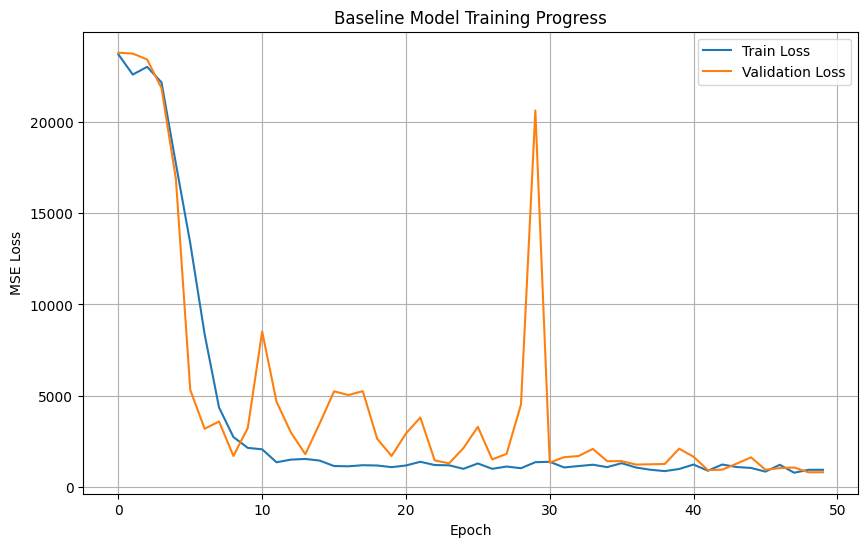

Baseline Model training completed!


In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import json
import cv2

class MultiDayDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, irradiance_values, target_size=(240, 320)):
        self.image_paths = image_paths
        self.irradiance_values = irradiance_values
        self.target_size = target_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        img = cv2.resize(img, self.target_size)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_tensor = torch.tensor(img).permute(2, 0, 1).float() / 255.0

        irradiance = torch.tensor(self.irradiance_values[idx], dtype=torch.float32)
        return img_tensor, irradiance

def get_multi_day_dataset(image_dirs, irradiance_files):
    image_paths = []
    irradiance_values = []

    for img_dir, irr_file in zip(image_dirs, irradiance_files):
        if irr_file.endswith('.csv'):
            df = pd.read_csv(irr_file)
            values = df.iloc[:, 1].values.astype(np.float32)
        else:
            values = np.loadtxt(irr_file, delimiter=',')[:, 1].astype(np.float32)

        files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        files = files[:len(values)]

        image_paths.extend([os.path.join(img_dir, f) for f in files])
        irradiance_values.extend(values[:len(files)])

    return MultiDayDataset(image_paths, irradiance_values)

class BaselineTrainer:
    """
    Trainer class for baseline nowcasting model following paper methodology
    """

    def __init__(self, model_type='standard', config=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        self.config = {
            'learning_rate': 1e-4,
            'batch_size': 128,
            'num_epochs': 20,
            'weight_decay': 1e-4,
            'scheduler_patience': 10,
            'early_stopping_patience': 15,
            'save_dir': 'models',
            'log_dir': 'logs'
        }

        if config:
            self.config.update(config)

        os.makedirs(self.config['save_dir'], exist_ok=True)
        os.makedirs(self.config['log_dir'], exist_ok=True)

        if model_type == 'with_features':
            self.model = SolarBaselineWithFeatureExtraction().to(self.device)
        else:
            self.model = SolarBaselineRegression().to(self.device)

        self.optimizer = optim.Adam(
            self.model.parameters(),
            lr=self.config['learning_rate'],
            weight_decay=self.config['weight_decay']
        )

        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer,
            mode='min',
            patience=self.config['scheduler_patience'],
            factor=0.5,
        )

        self.criterion = nn.MSELoss()

        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.patience_counter = 0

    def train_epoch(self, train_loader):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0.0
        num_batches = 0

        with tqdm(train_loader, desc="Training") as pbar:
            for batch_idx, (images, targets) in enumerate(pbar):
                images, targets = images.to(self.device), targets.to(self.device)

                self.optimizer.zero_grad()

                outputs = self.model(images)
                loss = self.criterion(outputs.squeeze(), targets)

                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

                pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

        return total_loss / num_batches

    def validate_epoch(self, val_loader):
        """Validate for one epoch"""
        self.model.eval()
        total_loss = 0.0
        predictions = []
        targets = []

        with torch.no_grad():
            with tqdm(val_loader, desc="Validation") as pbar:
                for images, batch_targets in pbar:
                    images, batch_targets = images.to(self.device), batch_targets.to(self.device)

                    outputs = self.model(images)
                    loss = self.criterion(outputs.squeeze(), batch_targets)

                    total_loss += loss.item()

                    predictions.extend(outputs.squeeze().cpu().numpy())
                    targets.extend(batch_targets.cpu().numpy())

                    pbar.set_postfix({'Val Loss': f'{loss.item():.4f}'})

        avg_loss = total_loss / len(val_loader)

        predictions = np.array(predictions)
        targets = np.array(targets)

        mse = mean_squared_error(targets, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(targets, predictions)

        return avg_loss, rmse, mae, predictions, targets

    def train(self, train_loader, val_loader=None):
        """Main training loop"""
        print(f"Starting training for {self.config['num_epochs']} epochs...")
        print(f"Model parameters: {sum(p.numel() for p in self.model.parameters()):,}")

        for epoch in range(self.config['num_epochs']):
            print(f"\nEpoch {epoch+1}/{self.config['num_epochs']}")

            train_loss = self.train_epoch(train_loader)
            self.train_losses.append(train_loss)

            print(f"Train Loss: {train_loss:.4f}")

            if val_loader is not None:
                val_loss, rmse, mae, predictions, targets = self.validate_epoch(val_loader)
                self.val_losses.append(val_loss)

                print(f"Val Loss: {val_loss:.4f}, RMSE: {rmse:.2f} W/m², MAE: {mae:.2f} W/m²")

                self.scheduler.step(val_loss)

                if val_loss < self.best_val_loss:
                    self.best_val_loss = val_loss
                    self.patience_counter = 0

                    torch.save({
                        'epoch': epoch,
                        'model_state_dict': self.model.state_dict(),
                        'optimizer_state_dict': self.optimizer.state_dict(),
                        'val_loss': val_loss,
                        'config': self.config
                    }, os.path.join(self.config['save_dir'], 'best_baseline_model.pth'))

                    print(f"New best model saved! RMSE: {rmse:.2f} W/m²")
                else:
                    self.patience_counter += 1

                if self.patience_counter >= self.config['early_stopping_patience']:
                    print(f"Early stopping triggered after {epoch+1} epochs")
                    break

        torch.save({
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses
        }, os.path.join(self.config['save_dir'], 'final_baseline_model.pth'))

        history = {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'config': self.config
        }

        with open(os.path.join(self.config['log_dir'], 'baseline_training_history.json'), 'w') as f:
            json.dump(history, f, indent=2)

        print("Training completed!")
        return self.train_losses, self.val_losses

    def load_model(self, checkpoint_path):
        """Load a saved model"""
        checkpoint = torch.load(checkpoint_path, map_location=self.device)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        return checkpoint

    def evaluate(self, test_loader):
        """Evaluate model on test set"""
        self.model.eval()
        predictions = []
        targets = []

        with torch.no_grad():
            for images, batch_targets in tqdm(test_loader, desc="Evaluating"):
                images, batch_targets = images.to(self.device), batch_targets.to(self.device)

                outputs = self.model(images)
                predictions.extend(outputs.squeeze().cpu().numpy())
                targets.extend(batch_targets.cpu().numpy())

        predictions = np.array(predictions)
        targets = np.array(targets)

        mse = mean_squared_error(targets, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(targets, predictions)

        print(f"Test Results - RMSE: {rmse:.2f} W/m², MAE: {mae:.2f} W/m²")

        return rmse, mae, predictions, targets

def train_baseline_nowcasting():
    """Main function to train Baseline Model nowcasting model"""

    config = {
        'learning_rate': 1e-4,
        'batch_size': 128,
        'num_epochs': 50,
        'image_dirs': [
            '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_15/infrared',
            '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_16/infrared'
        ],
        'irradiance_files': [
            '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_15/pyranometer/2019_01_15.csv',
            '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_16/pyranometer/2019_01_16.csv'
        ]
    }

    print("Loading multi-day dataset...")
    dataset = get_multi_day_dataset(config['image_dirs'], config['irradiance_files'])

    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size

    train_dataset, val_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size]
    )

    train_loader = DataLoader(
        train_dataset,
        batch_size=config['batch_size'],
        shuffle=True,
        num_workers=2
        )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config['batch_size'],
        shuffle=False,
        num_workers=2
    )

    print(f"Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")

    trainer = BaselineTrainer(model_type='standard', config=config)

    train_losses, val_losses = trainer.train(train_loader, val_loader)

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Baseline Model Training Progress')
    plt.legend()
    plt.grid(True)
    plt.savefig('logs/cnn_training_curves.png')
    plt.show()

    print("Baseline Model training completed!")

if __name__ == '__main__':
    train_baseline_nowcasting()